# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 4 K-Means Clustering ##

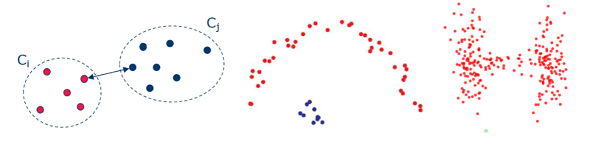

# Review #
Before we start, let's have a quick recap of the lecture.

# Clustering

Clustering a set of data means separating or telling the differences between several data groups. While this sounds a lot like classification, they have different objectives. 

1. **Classification** tries to predict the label of unseen data (new data). (*supervised learning*)
2. **Clustering** aims to put all similar data into a group without pre-defined labels. (*unsupervised learning*)

In real life, classification would be used in a decision-making system, like predicting the weather, detecting defects in the manufactory, etc. By comparison, clustering would probably be used in analyzing cases. For example, given the collected sales data and some simple family backgrounds of the customers, we can analyze the data and see what types of customers there are (by looking at how they can be grouped).

Therefore, clustering and classification mean very different things. Although, in some cases, they can be used interchangeably. E.g., knowing how to classify the data is the same as knowing how to cluster it by inferencing all the data once; knowing how to cluster the data is basically the same as knowing how to classify it by simply assigning labels to each cluster. 

# K-means clustering

To achieve the goal of clustering the data, we're going to review one of the simplest algorithms, K-means clustering.

K-means clustering is an **unsupervised** learning algorithm, which means it doesn't need any labels. Without labels, the model doesn't even know how many classes there are in total. In fact, that's why the algorithm is called "**K**"-mean, because the algorithm would divide all the data into "**K**" clusters, **agnostic to the exact number of groups** that may exist inside the data.

## The Algorithm

To achieve the goal, the algorithm needs to run the following steps:

1. Choose K random data points as the "centroids" (the mean of a cluster) of the dataset. 
2. Compute the distance between each data point in our training set to the centroids in the current iteration.
3. Assign each data to the closest centroid according to the distance found.
4. With the current cluster assignments, re-compute the centroids using the current cluster memberships.
5. Repeat 2 to 4 until the criterion to leave the loop is met.

## Evaluation of K-Means Clustering

In real-world scenarios, the dataset is often massive in size. Therefore, it could be hard to find a good assignment, and the performance may oscillate (getting stuck in a sub-optimal solution). Therefore, it would be nice to have a criterion as a metric to tell when the model is good enough or gets stuck at sub-optimal performance during training.

One common way to achieve the evaluation is the sum of squared error (SSE), as introduced in the lecture.

$$
    SSE = \sum_{j}^{K}\sum_{i}^{N_j}(x_i - c_j)^2
$$

where $K$ and $N_j$ represent the total number of clusters and elements inside cluster $j$, respectively. $x_i$ is the i<sup>th</sup> element in cluster $j$ and $c_j$ is the centroid of cluster $j$.

The metric is also used in Elbow's method to help us determine the optimal value of K. If you are interested, you can read [more about it](https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

## Convergence of K-Means Clustering

In the K-means clustering algorithm, we are given a set of $m$ points $x_i\in\mathbb{R}^d, i\in\{1,\dots,m\}$, and we want to
find the centers of $k$ clusters $\mu=(\mu_1,\dots,\mu_k)$ by minimizing the average distance from the points to the closest cluster center, which is exactly the SSE. 

We run the K-means clustering algorithm iteratively until it meets the convergence criterion. The **convergence criterion** is that **the centroids of the clusters are the same as those in the last iteration**. That means the algorithm stops when no change occurs during the centroid assignment step. 

Note that the criterion for K-means clustering is **guaranteed to converge to a local optimum**. Because in each iteration:
1. If the old centroids are the same as the new ones, then the next assignment step will again be the same.
2. If the new centroids differ from the old, the newer clustering has a lower SSE.

That means **SSE is guaranteed to decrease monotonically in each iteration until convergence**.

In practical implementation, we usually use the **maximum number of iterations** for updating cluster centroids. The number of maximum iterations limits the number of iterations in the K-means clustering algorithm. Iteration stops after the maximum number, even if the convergence criterion is not satisfied.

## Limitations

There are some limitations of K-means clustering. For example,
- It is very **sensitive** to centroids initialization and outliers.
- It cannot discover clusters with sophisticated shapes (non-hyper ellipsoids or hypersphere).
- The choices of K could lead to very drastic differences in performance.
- It cannot handle categorical feature values. 

We will use the KMeans class from the sklearn library to demonstrate those limitations, but **you are not allowed to use this class in your task assignment directly** because it will be plug-and-play. 

label 0: r
label 1: g
label 2: b
label 3: c
Dataset features (X.shape): (10000, 2)
Dataset labels (y.shape): (10000,)
First 5 data samples of X:
 [[-2.9688544   7.93444368]
 [-8.35830079 -9.10978623]
 [ 5.25364969  2.34862554]
 [-7.71596573 -8.74655775]
 [-6.17837155 -6.15703927]]
The labels of first 5 data samples of X:
 [0 2 1 2 2]


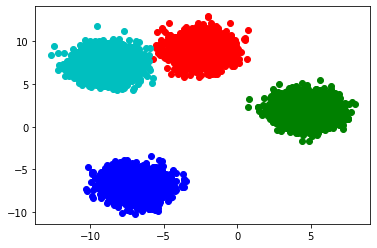

In [1]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer

def plot_diagram(X, y=None, k=None):

    cycol = cycle('rgbcmk')                             # Create a color cycle iterable object
    if y is not None:                                   # y is the label of each individual points
        if k is None:                                   # k is number of cluster there is
            k = y.max() + 1                             # The total number of clusters is the max label + 1, assuming
                                                        # the class labels are consecutive and start from 0
        for i, c in zip(range(k), cycol):
            print('label %s: %s' % (str(i), c))
            plt.scatter(*X[y == i].T, c=c)              # Plot points of class with color c

def plot_points(points, marker='o'):
    
    plt.scatter(*points, c='w', marker=marker)          # Plot points with color white and specified shape
    pass

# Create a dataset with 4 blobs of cluster
X, y = datasets.make_blobs(10000, 2, centers=4, random_state=42)
plot_diagram(X, y)
print('Dataset features (X.shape):', X.shape)
print('Dataset labels (y.shape):', y.shape)
print('First 5 data samples of X:\n', X[0:5])
print('The labels of first 5 data samples of X:\n', y[0:5])

### Limitations 1 -  Very Sensitive to Centroids Initialization and Outliers

After generating the dataset, we run the KMeans algorithm on this dataset to find the clusters. 
For the first KMeans model, we force it to use random seed **5** in the random initialization and provide the correct cluster numbers (4 clusters) for the model. We can see that the algorithm correctly clusters our data points into 4 distinct clusters. 

KMeans using random seed 5 to initialize 4 cluster centroids.
label 0: r
label 1: g
label 2: b
label 3: c


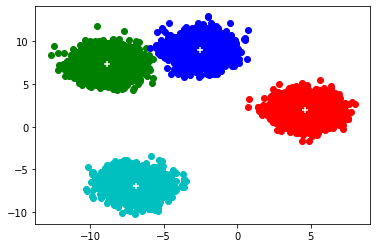

In [2]:
kmeans_5 = KMeans(n_clusters=4, random_state=5, init='random', n_init=1)
kmeans_5 = kmeans_5.fit(X)
print('KMeans using random seed 5 to initialize 4 cluster centroids.')
plot_diagram(X, kmeans_5.labels_, 4)
plot_points(kmeans_5.cluster_centers_.T, marker='+')

Then, let's try doing the KMeans with another random seed used for random initialization, says, random seed **1**. We can see that this results in bad clustering even though the algorithm has converged. 

KMeans using random seed 1 to initialize 4 cluster centroids.
label 0: r
label 1: g
label 2: b
label 3: c


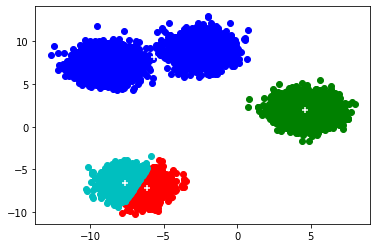

In [3]:
kmeans_1 = KMeans(n_clusters=4, random_state=1, init='random', n_init=1)
kmeans_1 = kmeans_1.fit(X)
print('KMeans using random seed 1 to initialize 4 cluster centroids.')
plot_diagram(X, kmeans_1.labels_, 4)
plot_points(kmeans_1.cluster_centers_.T, marker='+')

Besides the KMeans being sensitive to random initialization, it is also sensitive to outliers because a mean (used by the algorithm to calculate the centroids) is easily influenced by extreme values. The mean, as a statistic, is generally sensitive to outliers. For example, assuming we have extracted all the feature 1 of each data sample from a dataset. Call it **f1**. 

In [4]:
f1 = np.array([2,2,2,3,3,3,4,4,4])
mean_f1 = np.mean(f1)
print('Mean of f1 is %s.' % str(mean_f1))

Mean of f1 is 3.0.


Then, we insert an outlier **23 to f1**, which means we receive a new coming sample with feature 1 of 23. 

In [5]:
f1 = np.array([2,2,2,3,3,3,4,4,4, 23])
mean_f1 = np.mean(f1)
print('Mean of f1 is %s.' % str(mean_f1))

Mean of f1 is 5.0.


If we add a single 23 to that, the mean becomes **5**, which is larger than any of the other values. Since in KMeans, you'll be taking the mean a lot, and you wind up with a lot of outlier-sensitive calculations. 

### Limitations 2 -  Cannot Discover Clusters with Sophisticated Shapes

In general, KMeans can only cluster well-shaped circular clusters existing in the dataset. This is because, on every iteration, the centroid position of the clusters changes based on the mean value. This can be seen as the center of a circle. Let’s see an example KMeans cannot generate good clusters in any way.

label 0: r
label 1: g


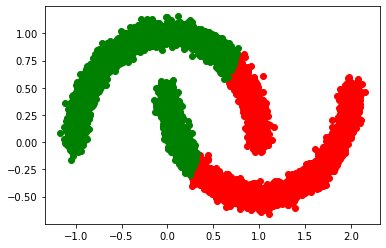

In [6]:
X_moon, y_moon = datasets.make_moons(10000, noise=0.05)
kmeans_moons = KMeans(n_clusters=2)
kmeans_moons = kmeans_moons.fit(X_moon)
plot_diagram(X_moon, kmeans_moons.labels_, 2)
plot_points(kmeans_moons.cluster_centers_.T, marker='+')

### Limitations 3 -  The Choices of K

As you may already have found out, KMeans need to receive the number of clusters beforehand. However, as a typical algorithm used in the unsupervised scenario (no labels), we may not know how many clusters exist in the data distribution. And sometimes, this question is exactly what we are looking for. Without a correct number of clusters fed to the KMeans model beforehand, it does not perform well. Let’s reuse the previous well-clustered example but with the number of clusters equals to **2 (was 4)**. 

KMeans using random seed 5 to initialize 2 cluster centroids.
label 0: r
label 1: g
label 2: b
label 3: c


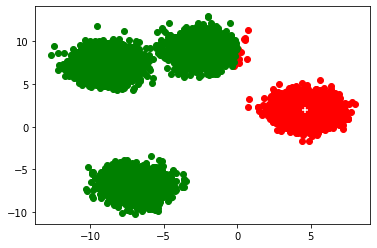

In [7]:
kmeans_5_new = KMeans(n_clusters=2, random_state=5, init='random', n_init=1)
kmeans_5_new = kmeans_5_new.fit(X)
print('KMeans using random seed 5 to initialize 2 cluster centroids.')
plot_diagram(X, kmeans_5_new.labels_, 4)
plot_points(kmeans_5_new.cluster_centers_.T, marker='+')

### Limitations 4 -  Cannot Handle Categorical Features

Reminder:
Examples of numerical features: **people’s height - 180 cm, 160 cm, 175 cm, etc.** <br>
Examples of categorical features: **color - red, green, blue, etc**. 

We will first use a simple method to convert numerical features to categorical features. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html for the details, but it is not mandatory. Basically, bin edges tell us that all numerical values between **-12.69470309** and **-10.6235066** are converted to 0, those between **-10.6235066** and **-8.55231012** are converted to 1, and keep going. There are two arrays because we have converted all two feature columns from numerical to categorical.

Bin edges:
 [array([-12.69470309, -10.6235066 ,  -8.55231012,  -6.48111363,
         -4.40991715,  -2.33872067,  -0.26752418,   1.8036723 ,
          3.87486879,   5.94606527,   8.01726176])
 array([-10.20961339,  -7.89459967,  -5.57958595,  -3.26457222,
         -0.9495585 ,   1.36545522,   3.68046894,   5.99548267,
          8.31049639,  10.62551011,  12.94052383])             ]
First 5 data instance of original_X:
 [[-2.9688544   7.93444368]
 [-8.35830079 -9.10978623]
 [ 5.25364969  2.34862554]
 [-7.71596573 -8.74655775]
 [-6.17837155 -6.15703927]]
First 5 data instance of X_categ:
 [[4. 7.]
 [2. 0.]
 [8. 5.]
 [2. 0.]
 [3. 1.]]
The labels of first 5 data instance of X_categ:
 [0 2 1 2 2]
label 0: r
label 1: g
label 2: b
label 3: c
None


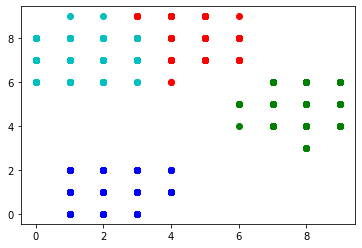

In [8]:
# Create a dataset with 4 blobs of cluster
X_categ, y_categ = datasets.make_blobs(10000, 2, centers=4, random_state=42)
original_X = X_categ.copy()

# Change the feature columns from numerical to categorical
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
est.fit(X_categ)
X_categ = est.transform(X_categ)
print('Bin edges:\n', est.bin_edges_)
print('First 5 data instance of original_X:\n', original_X[0:5])
print('First 5 data instance of X_categ:\n', X_categ[0:5])
print('The labels of first 5 data instance of X_categ:\n', y_categ[0:5])
print(plot_diagram(X_categ, y_categ))

Be careful that this color map (labels) was generated for numerical features, and after we convert it to categorical, it is meaningless. So, we will randomly select a cluster size other than 4 and check the KMeans output. Apparently, the model is still trying to cluster the data samples based on the numerical relation between feature values (e.g., **1 < 3 < 5**). But, what we expect is that it will only cluster based on if the two feature values are the same or not (e.g., **1 != 3 != 5**). 

KMeans using random seed 5 to initialize 2 cluster centroids.
label 0: r
label 1: g
label 2: b
label 3: c
label 4: m
label 5: k


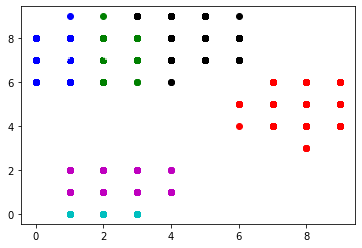

In [9]:
kmeans_categ = KMeans(n_clusters=6, random_state=5, init='random', n_init=1)
kmeans_categ = kmeans_categ.fit(X_categ)
print('KMeans using random seed 5 to initialize 2 cluster centroids.')
plot_diagram(X_categ, kmeans_categ.labels_, 6)
plot_points(kmeans_categ.cluster_centers_.T, marker='+')

The k-Means algorithm is not applicable to categorical data, as categorical variables are discrete and do not have any natural origin. For example, assuming 0 to be red, 1 to be green, and 2 to be blue. If we have three samples in this feature column to compare: **sample_0** has 0, **sample_1** has 1, and **sample_2** has 2. If these feature values are numerical, **sample_1** should be closer to **sample_0** than **sample_2** because the Euclidean distance between **sample_0** and **sample_1** is 1 while that between **sample_0** and **sample_2** is 2. But for now, this is categorical. So, the distance between **sample_0** and **sample_1** is the same as the distance between **sample_0** and **sample_2** because green shouldn’t be considered closer to red than blue. Computing the **Euclidean Distance** for such space is not meaningful.

# K-Means Variants

Of course, researchers have proposed many variants of K-means to address its limitations. In this lab, we focus on only the last one: “it cannot handle categorical feature values.” 

## K-mode

One of the variants that can handle categorical feature values is called the **K-mode**. It follows precisely the same procedure as the vanilla K-means but has two differences:
1. Instead of calculating the **Euclidean Distance** between each data point and cluster centroids, it treats the **Hamming Distance** as the measurement of distance. Basically, it is the number of positions at which the corresponding features are different. See reference: https://en.wikipedia.org/wiki/Hamming_distance.
2. Instead of calculating the **mean** value of data points that are assigned to the same cluster as the new centroids, it computes the **mode** value, that is, the most common feature category among the assigned data points of a cluster. 

Similarly, to achieve the goal, the algorithm needs to run the following steps:
1. Choose K random data points as the "centroids" (the mode of a cluster) of the dataset. 
2. Compute the Hamming distance between each data point in our training set to the centroids in the current iteration.
3. Assign each data to the closest centroid according to the distance found.
4. With the current cluster assignments, re-compute (using mode) the centroids using the current cluster memberships.
5. Repeat 2 to 4 until the criterion to leave the loop is met.

Apparently, K-mode is able to handle categorical features in a better way, but it losses the ability to handle numerical features. 

## K-prototype

Unfortunately, real-world data often contain mixed data types, including both numerical and categorical features, so both K-means and K-modes cannot be used in these scenarios. But with the basic understanding that K-means and K-modes can handle numerical and categorical features respectively, we can immediately come up with an easy solution to:
1. Adopt **K-means procedures (Euclidean Distance)** on the **numerical feature columns** of the mixed data.
2. Adopt **K-modes procedures (Hamming distance)** on the remaining **categorical feature columns**.
3. Finally, sum these two different distance measurements up to obtain the total distance that will be used to assign each point to the closest centroid.
This is called the K-prototype algorithm, and you can consider it an ensemble of K-means and K-modes clustering algorithms. Besides doing an ensemble on the distance measurement, we also need to do a similar thing on calculating the new centroid, or prototype (since we new consider mixed data type). 
1. Computes **the mean value of the numerical feature columns** of data points that are assigned to the same cluster as the **numerical part of new prototypes**.
2. Computes **the mode value of the categorical feature columns** of data points that are assigned to the same cluster as the **categorical part of new prototypes**.

Here is an example, assume that data points **X1=[180, red]**, **X2=[180, green]**, and **X3=[175, red]** are assigned to **Cluster1=[180, red]** after calculating the Euclidean Distance on the first column (comparing **X1=180, X2=180, X3=175** with **Cluster1=180**) and the Hamming distance on the second column (comparing **X1=red, X2=green, X3=red** with **Cluster1=red**). The next step is to find the mean value of **[X1=180, X2=180, X3=175]** and the mode value of **[X1=red, X2=green, X3=red]**, which is obvious: **[mean=178.33, mode=red]**. For this toy iteration, the last step is to update the prototype of **Cluster1** from the old value **[180, red]** to the new value **[178.33, red]**. And we are done with this single iteration. 

Now, we have a model that can handle both categorical and numerical features! How about its performance? Unfortunately, although it solves the last limitation we have mentioned about K-means, the remaining shortcomings still exist. There are many other variants of K-means and other new algorithms to address different limitations. You are welcome to explore these algorithms if you are interested. 